In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearnex import patch_sklearn
patch_sklearn()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df = pd.read_csv("/Users/john/Documents/Machine Learning/OnlineNewsPopularity/OnlineNewsPopularity.csv")
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [3]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [4]:
popularity_r = df[df.keys()[-1]]
popularity_r.describe()


count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
popular_label = pd.Series(label_encoder.fit_transform(popularity_r>=1400))

In [6]:
popular_label

0        0
1        0
2        1
3        0
4        0
        ..
39639    1
39640    1
39641    1
39642    0
39643    0
Length: 39644, dtype: int64

In [7]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

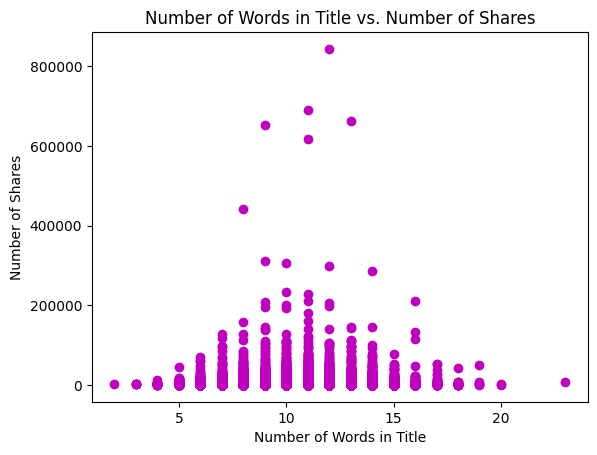

In [8]:
plt.scatter(df[' n_tokens_title'], df[' shares'],color = "m")
plt.xlabel('Number of Words in Title')
plt.ylabel('Number of Shares')
plt.title('Number of Words in Title vs. Number of Shares')
plt.show()

/var/folders/mx/lpkhv6713bgb_hbl_j18crhm0000gn/T/ipykernel_24960/4194549507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


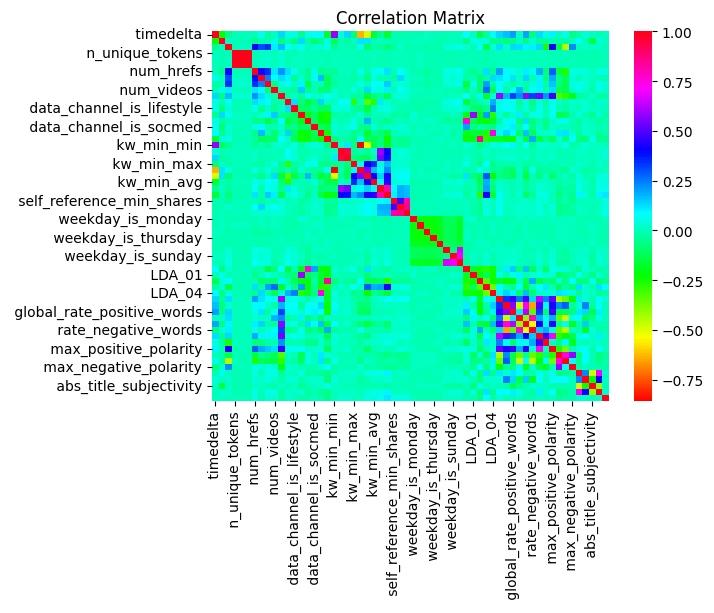

In [9]:
corr = df.corr()
sns.heatmap(corr, cmap='hsv')
plt.title('Correlation Matrix')
plt.show()

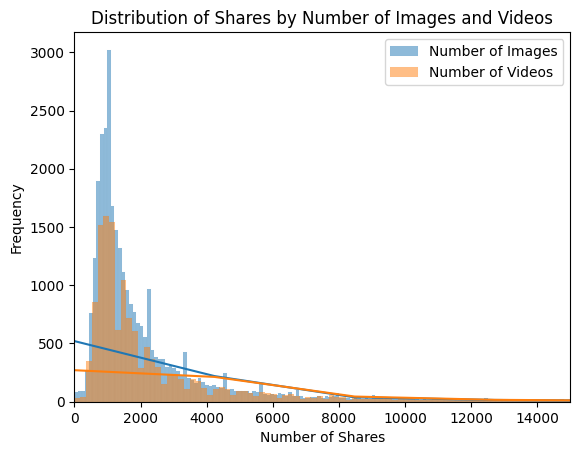

In [10]:
sns.histplot(df[df[' num_imgs'] > 0][' shares'], label='Number of Images', alpha=0.5, kde=True)
sns.histplot(df[df[' num_videos'] > 0][' shares'], label='Number of Videos', alpha=0.5, kde=True)
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.title('Distribution of Shares by Number of Images and Videos')
plt.xlim(0, 15000)
plt.legend()
plt.show()

In [11]:
data_channel_cols = [' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus',' data_channel_is_socmed',
' data_channel_is_tech', ' data_channel_is_world']

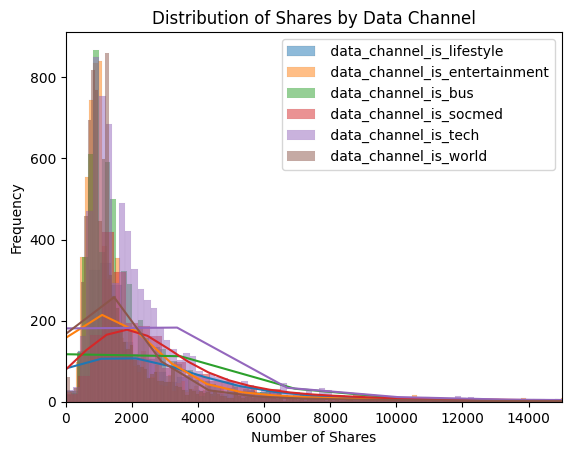

In [12]:
for col in data_channel_cols:
    sns.histplot(df[df[col] == 1][' shares'], label=col, alpha=0.5, kde=True)
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.title('Distribution of Shares by Data Channel')
plt.xlim(0, 15000)
plt.legend()
plt.show()

In [13]:
features_r = df.drop(['url',df.keys()[1],df.keys()[-1]], axis=1)
display(features_r.head())

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


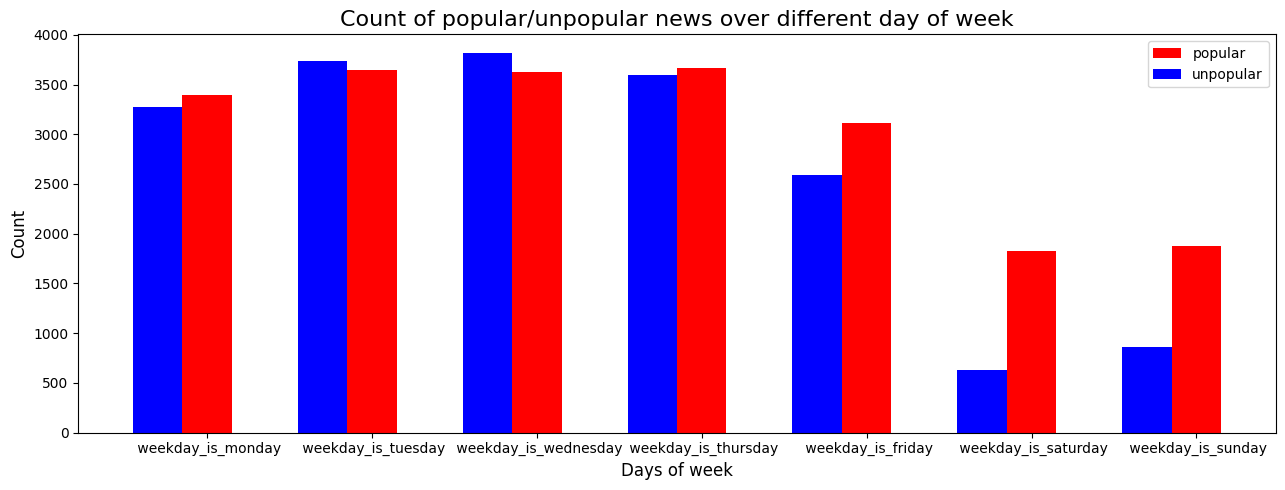

In [14]:
columns_day = features_r.columns.values[29:36]
unpop=df[df[' shares']<1400]
pop=df[df[' shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over different day of week", fontsize = 16)
pl.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_day)), columns_day)
pl.ylabel("Count", fontsize = 12)
pl.xlabel("Days of week", fontsize = 12)
    
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("days.pdf")
pl.show()  

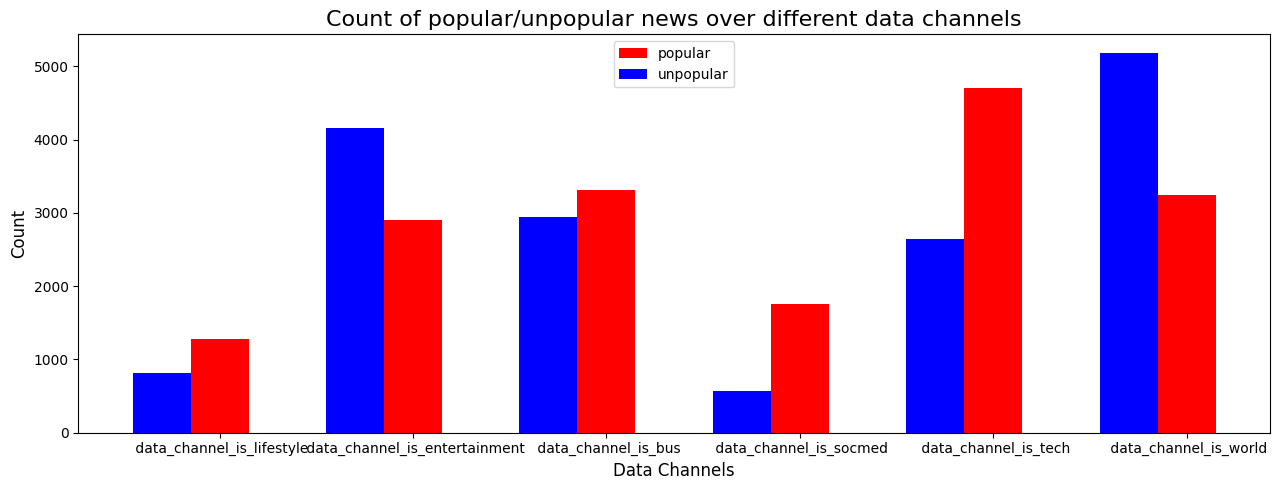

In [15]:
columns_chan=features_r.columns.values[11:17]
unpop_chan = unpop[columns_chan].sum().values
pop_chan = pop[columns_chan].sum().values
fig = pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over different data channels", fontsize = 16)
pl.bar(np.arange(len(columns_chan)), pop_chan, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_chan)) - 0.3, unpop_chan, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_chan)), columns_chan)

pl.ylabel("Count", fontsize = 12)
pl.xlabel("Data Channels", fontsize = 12)
    
pl.legend(loc = 'upper center')
pl.tight_layout()
pl.savefig("chan.pdf")
pl.show()  

In [16]:
df.drop(labels=['url', ' timedelta'], axis = 1, inplace=True)
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(df))
x

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,...,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920,-0.241028
1,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,...,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658,-0.230879
2,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,...,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658,-0.163018
3,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,...,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658,-0.188821
4,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,0.159400,...,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056,-0.248596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.284413,-0.425630,-0.005443,0.000675,-0.001346,-0.166229,0.961420,-0.426526,-0.060829,-0.029747,...,0.063865,-0.027151,-0.003726,0.075594,-0.183490,-0.562396,-0.269076,0.308055,-0.689658,-0.137216
39640,0.757447,-0.463838,0.042060,0.000675,0.059999,-0.166229,0.961420,-0.185832,11.380809,-0.169058,...,0.573773,-0.228941,0.379044,0.420082,0.078642,0.054425,3.498156,-0.751332,3.729424,-0.128615
39641,-0.188622,-0.221852,-0.009050,0.000675,-0.013798,1.157470,-0.594963,0.897288,-0.060829,0.626110,...,0.573773,-1.036100,-0.758786,-0.957871,-0.620377,0.531059,0.244637,-1.569949,-0.087056,-0.128615
39642,-2.080761,0.287592,-0.002477,0.000675,0.001068,-0.077983,-0.594963,-0.426526,-0.304268,0.505491,...,-0.461978,-1.036100,0.424968,0.075594,0.996104,-0.870807,-0.269076,0.837749,-0.689658,-0.197421


In [18]:
y = x[58]
y

0       -0.241028
1       -0.230879
2       -0.163018
3       -0.188821
4       -0.248596
           ...   
39639   -0.137216
39640   -0.128615
39641   -0.128615
39642   -0.197421
39643   -0.180220
Name: 58, Length: 39644, dtype: float64

In [19]:
X = x.iloc[:,0:58]
X

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,...,0.237337,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920
1,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,...,-0.640040,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658
2,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,...,1.358401,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658
3,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,...,0.307442,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658
4,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,0.159400,...,0.548135,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.284413,-0.425630,-0.005443,0.000675,-0.001346,-0.166229,0.961420,-0.426526,-0.060829,-0.029747,...,-0.191635,0.063865,-0.027151,-0.003726,0.075594,-0.183490,-0.562396,-0.269076,0.308055,-0.689658
39640,0.757447,-0.463838,0.042060,0.000675,0.059999,-0.166229,0.961420,-0.185832,11.380809,-0.169058,...,0.200881,0.573773,-0.228941,0.379044,0.420082,0.078642,0.054425,3.498156,-0.751332,3.729424
39641,-0.188622,-0.221852,-0.009050,0.000675,-0.013798,1.157470,-0.594963,0.897288,-0.060829,0.626110,...,-0.445302,0.573773,-1.036100,-0.758786,-0.957871,-0.620377,0.531059,0.244637,-1.569949,-0.087056
39642,-2.080761,0.287592,-0.002477,0.000675,0.001068,-0.077983,-0.594963,-0.426526,-0.304268,0.505491,...,-1.118934,-0.461978,-1.036100,0.424968,0.075594,0.996104,-0.870807,-0.269076,0.837749,-0.689658


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,popular_label, test_size = 0.2,stratify = popular_label,random_state = 42)

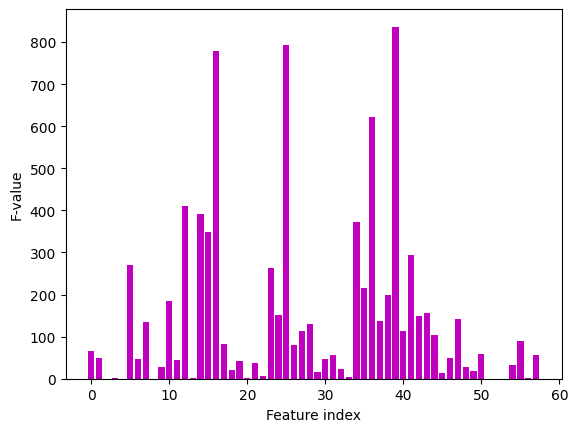

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
f_selector = SelectKBest(score_func = f_regression, k = 'all')
f_selector.fit(X_train,y_train)
X_train_fs = f_selector.transform(X_train)
X_test_fs = f_selector.transform(X_test)

plt.bar([i for i in range(len(f_selector.scores_)) ],f_selector.scores_,color="m")

plt.xlabel("Feature index")
plt.ylabel("F-value")
plt.show()

In [22]:
df.columns[25]

' kw_avg_avg'

In [23]:
X_train.shape

(31715, 58)

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

In [25]:
y_train

14371    1
8258     1
6286     1
11816    0
39381    1
        ..
36940    1
10718    0
10524    0
6765     1
13990    1
Length: 31715, dtype: int64

In [26]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
14371,-0.188622,0.854349,-0.010443,0.000675,-0.009595,1.422210,1.480214,1.258328,-0.060829,-0.025307,...,0.954161,-0.637259,0.981798,-0.227189,-0.613383,0.602906,2.213297,-4.036308,0.837749,3.729424
8258,-1.607726,-0.979650,0.068175,0.000675,0.042192,-0.607463,-0.594963,-0.546872,-0.304268,1.036589,...,-0.036588,2.167238,-1.036100,-0.414768,-0.613383,0.602906,0.671245,0.672732,-1.810719,0.415112
6286,-0.661657,0.419199,-0.014272,0.000675,0.000147,-0.166229,-0.854360,-0.546872,-0.060829,0.140251,...,0.676255,0.063865,0.174639,0.077534,-0.268895,0.253397,1.904887,2.744709,0.308055,2.845607
11816,1.230482,-0.644266,0.036501,0.000675,0.000589,-0.695709,-0.335566,-0.546872,-0.060829,0.846920,...,-0.351302,0.573773,-1.036100,0.090879,0.075594,-0.183490,0.671245,1.614540,-1.810719,1.519883
39381,0.284413,-0.391667,0.000228,0.000675,0.024757,-0.342723,-0.335566,-0.426526,-0.304268,-0.037500,...,0.224293,0.063865,-0.228941,-0.240005,0.075594,0.378222,-0.562396,-0.269076,0.308055,-0.689658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36940,2.649586,1.966636,-0.038780,0.000675,-0.026371,-0.430969,-0.076169,-0.185832,-0.304268,-0.217525,...,-0.318539,0.063865,-0.027151,-0.740003,-1.646847,0.602906,0.979656,1.614540,-1.281025,1.519883
10718,-1.134691,0.240893,-0.018025,0.000675,-0.007417,-0.430969,-0.076169,-0.426526,-0.304268,0.500918,...,-0.273831,-0.461978,0.174639,-0.864957,-0.785627,0.602906,1.904887,-2.529415,0.308055,1.961791
10524,-1.134691,-0.538132,0.038525,0.000675,0.049586,-0.166229,-0.854360,-0.426526,-0.304268,0.615849,...,-0.032159,-0.637259,0.981798,-1.882776,0.075594,-4.115471,-0.870807,-0.269076,0.837749,-0.689658
6765,-0.661657,-0.618794,0.014938,0.000675,0.011845,0.363251,1.480214,-0.546872,-0.304268,0.168117,...,0.137333,0.573773,-0.632520,2.031912,1.798034,1.127170,-0.870807,-0.269076,0.837749,-0.689658


In [27]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(X_train)
X_train_2D_pca = pca2.transform(X_train)
print(f'PCA Features: Number of samples and attributes: {X_train_2D_pca.shape}')

PCA Features: Number of samples and attributes: (31715, 2)


In [28]:
from sklearn.decomposition import PCA
Pca2 = PCA(n_components=2)
Pca2.fit(X)
X_2D_pca = Pca2.transform(X)
print(f'PCA Features: Number of samples and attributes: {X_2D_pca.shape}')

PCA Features: Number of samples and attributes: (39644, 2)


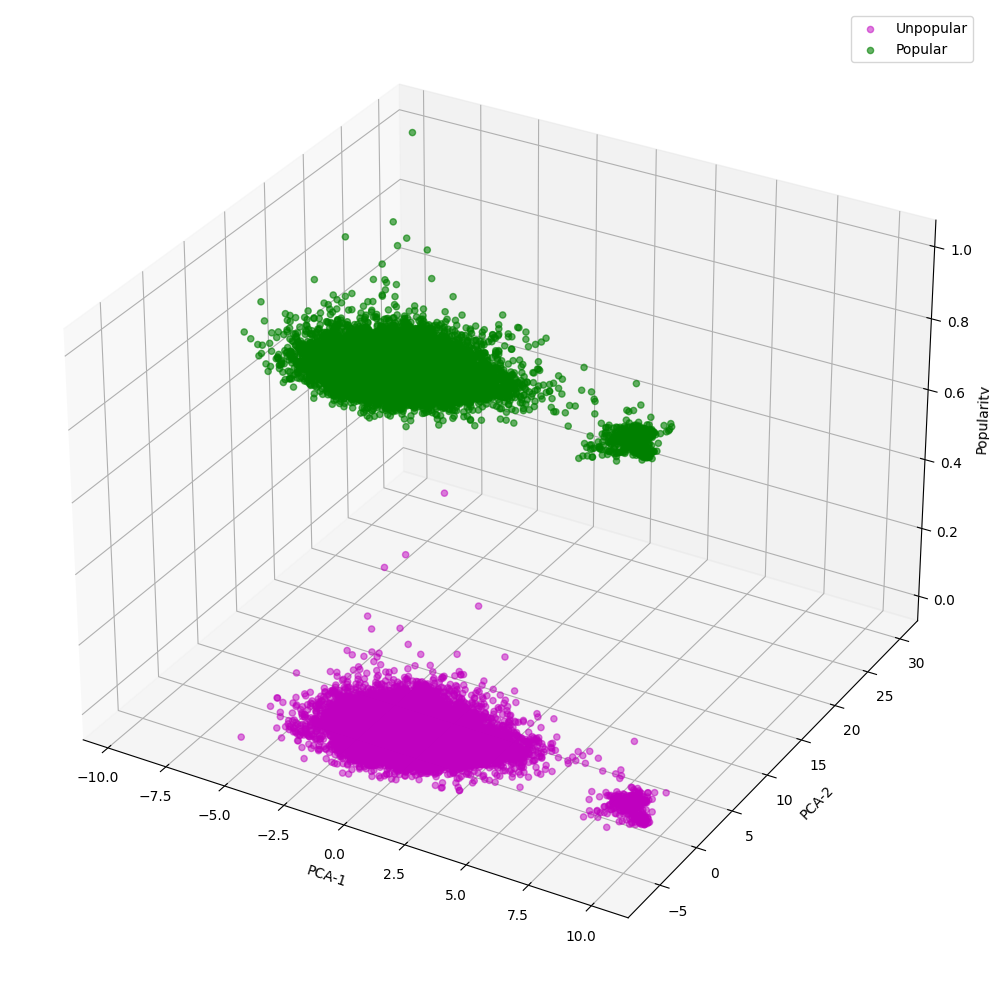

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train_2D_pca[y_train==0, 0], X_train_2D_pca[y_train==0, 1],
y_train[y_train==0], color="m",label = "Unpopular",alpha = 0.5);
ax.scatter(X_train_2D_pca[y_train==1, 0], X_train_2D_pca[y_train==1, 1],
y_train[y_train==1], color="g",label = "Popular",alpha = 0.6);
ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Popularity")

plt.legend()
plt.tight_layout()
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression
lr_cf_std = LogisticRegression()
lr_cf_std.fit(X_train,y_train)

LogisticRegression()

In [31]:
score = lr_cf_std.score(X_test,y_test)
print(score)

0.6546853323243789


In [32]:
y_pred = lr_cf_std.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
con_Mat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(con_Mat)

[[2234 1464]
 [1274 2957]]


In [34]:
y_train.shape

(31715,)

In [35]:
classes = ['Unpopular','Popular']

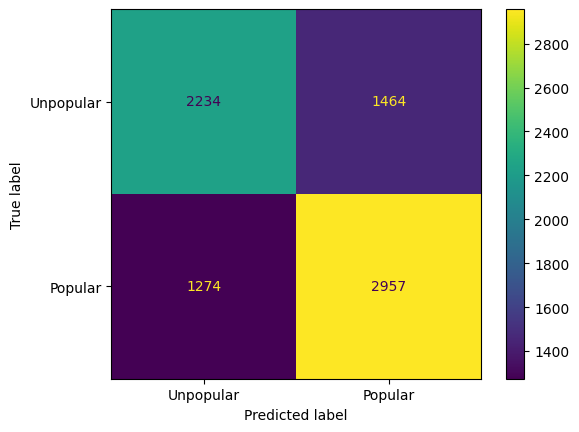

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = con_Mat,display_labels = classes)
disp.plot()
plt.show()

In [37]:
X_train.shape

(31715, 58)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,popular_label, test_size = 0.2,stratify = popular_label,random_state = 42)

Linear SVM

To reduce the runtime

In [39]:
!pip install scikit-learn-intelex

from sklearnex import patch_sklearn
patch_sklearn()

from sklearn import svm
linearSVM = svm.SVC(kernel='linear')

     |████████████████████████████████| 189.9 MB 40 kB/s  eta 0:00:01    |██                              | 12.5 MB 1.9 MB/s eta 0:01:35     |████                            | 23.2 MB 1.8 MB/s eta 0:01:34     |█████▎                          | 31.1 MB 862 kB/s eta 0:03:05     |█████▉                          | 34.7 MB 2.3 MB/s eta 0:01:09     |██████▎                         | 37.4 MB 1.4 MB/s eta 0:01:49     |████████                        | 47.0 MB 334 kB/s eta 0:07:08     |████████▊                       | 51.7 MB 641 kB/s eta 0:03:36     |██████████▉                     | 64.1 MB 2.3 MB/s eta 0:00:56     |██████████████████              | 106.4 MB 2.9 MB/s eta 0:00:29     |███████████████████             | 113.0 MB 8.3 MB/s eta 0:00:10     |████████████████████▉           | 123.5 MB 2.9 MB/s eta 0:00:23     |██████████████████████▏         | 131.8 MB 2.5 MB/s eta 0:00:24     |██████████████████████▋         | 134.5 MB 2.8 MB/s eta 0:00:20 MB 631 kB/s eta 0:00:36     |█████████████

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [40]:
from sklearn import datasets, svm, metrics
linearSVM = svm.SVC(kernel = "linear")

In [41]:
linearSVM.fit(X_train,y_train)

SVC(kernel='linear')

In [42]:
predicted = linearSVM.predict(X_test)


In [43]:
predicted

array([0, 0, 0, ..., 1, 1, 1])

In [44]:
print(predicted[:5])
print(y_test[:5])

[0 0 0 1 1]
23320    0
35726    0
10771    0
37569    1
38236    1
dtype: int64


In [45]:
from sklearn.metrics import accuracy_score
linear_acc = accuracy_score(y_test,predicted)
print(linear_acc)

0.6486316054988018


Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.63      0.60      0.62      3698
           1       0.67      0.69      0.68      4231

    accuracy                           0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929




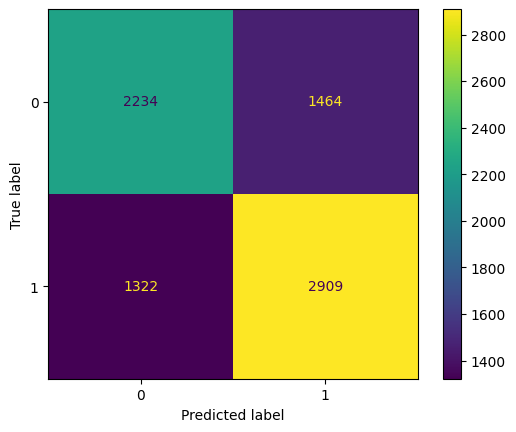

In [46]:
print("Classification report for classifier %s:\n%s\n"
% (linearSVM, metrics.classification_report(y_test, predicted)))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.64      0.59      0.61      3698
           1       0.66      0.72      0.69      4231

    accuracy                           0.66      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.66      0.65      7929




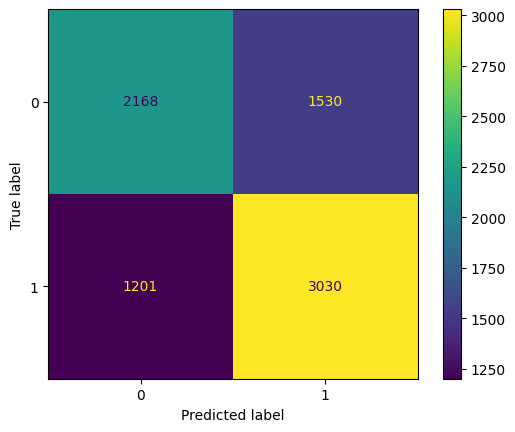

In [47]:
kernelSVM = svm.SVC(kernel='rbf')
kernelSVM.fit(X_train, y_train)
predicted = kernelSVM.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
% (kernelSVM, metrics.classification_report(y_test, predicted)))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()

Classification report for classifier SVC(kernel='poly'):
              precision    recall  f1-score   support

           0       0.63      0.60      0.62      3698
           1       0.67      0.69      0.68      4231

    accuracy                           0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929




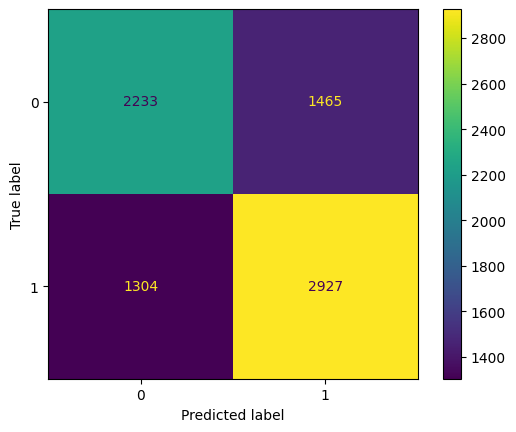

In [48]:
kernelSVM = svm.SVC(kernel='poly')
kernelSVM.fit(X_train, y_train)
predicted = kernelSVM.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
% (kernelSVM, metrics.classification_report(y_test, predicted)))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()

In [49]:
Confusion Matrix SVM after Standardization

SyntaxError: invalid syntax (4122762921.py, line 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.62      0.60      0.61      3698
           1       0.66      0.68      0.67      4231

    accuracy                           0.64      7929
   macro avg       0.64      0.64      0.64      7929
weighted avg       0.64      0.64      0.64      7929




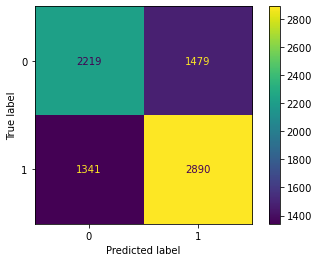

In [ ]:
linearSVM_std = svm.SVC(kernel='linear')
linearSVM_std.fit(X_train_std, y_train)
predicted = linearSVM_std.predict(X_test_std)
print("Classification report for classifier %s:\n%s\n"
% (linearSVM_std, metrics.classification_report(y_test, predicted)))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()


Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.64      0.58      0.61      3698
           1       0.66      0.71      0.69      4231

    accuracy                           0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929




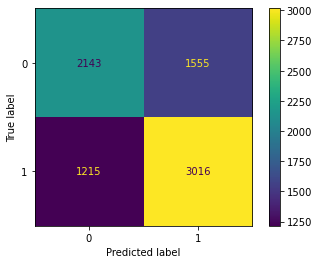

In [ ]:
kernelSVM_std = svm.SVC(kernel='rbf')
kernelSVM_std.fit(X_train_std, y_train)
predicted = kernelSVM_std.predict(X_test_std)
print("Classification report for classifier %s:\n%s\n"
% (kernelSVM_std, metrics.classification_report(y_test, predicted)))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()


Classification report for classifier SVC(kernel='poly'):
              precision    recall  f1-score   support

           0       0.63      0.60      0.62      3698
           1       0.67      0.69      0.68      4231

    accuracy                           0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929




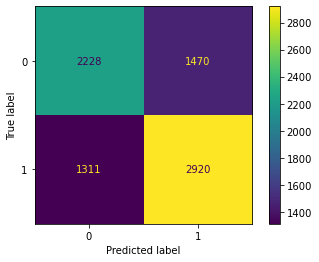

In [ ]:
kernelSVM_std = svm.SVC(kernel='poly')
kernelSVM_std.fit(X_train_std, y_train)
predicted = kernelSVM_std.predict(X_test_std)
print("Classification report for classifier %s:\n%s\n"
% (kernelSVM_std, metrics.classification_report(y_test, predicted)))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()


RBF SVM

In [ ]:
from sklearn.svm import SVC
cls = SVC(kernel = "rbf",random_state = 0)
cls.fit(X_train,y_train)

SVC(random_state=0)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


POLY

In [ ]:
from sklearn.svm import SVC
classify = SVC(kernel = "poly",random_state = 0)
classify.fit(X_train,y_train)

SVC(kernel='poly', random_state=0)

In [ ]:
poly_pred = classify.predict(X_test)
poly_pred

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
poly_acc = accuracy_score(y_test,poly_pred)
print(poly_acc)

0.6507756337495271


In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
14371,-0.188622,0.854349,-0.010443,0.000675,-0.009595,1.422210,1.480214,1.258328,-0.060829,-0.025307,...,0.954161,-0.637259,0.981798,-0.227189,-0.613383,0.602906,2.213297,-4.036308,0.837749,3.729424
8258,-1.607726,-0.979650,0.068175,0.000675,0.042192,-0.607463,-0.594963,-0.546872,-0.304268,1.036589,...,-0.036588,2.167238,-1.036100,-0.414768,-0.613383,0.602906,0.671245,0.672732,-1.810719,0.415112
6286,-0.661657,0.419199,-0.014272,0.000675,0.000147,-0.166229,-0.854360,-0.546872,-0.060829,0.140251,...,0.676255,0.063865,0.174639,0.077534,-0.268895,0.253397,1.904887,2.744709,0.308055,2.845607
11816,1.230482,-0.644266,0.036501,0.000675,0.000589,-0.695709,-0.335566,-0.546872,-0.060829,0.846920,...,-0.351302,0.573773,-1.036100,0.090879,0.075594,-0.183490,0.671245,1.614540,-1.810719,1.519883
39381,0.284413,-0.391667,0.000228,0.000675,0.024757,-0.342723,-0.335566,-0.426526,-0.304268,-0.037500,...,0.224293,0.063865,-0.228941,-0.240005,0.075594,0.378222,-0.562396,-0.269076,0.308055,-0.689658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36940,2.649586,1.966636,-0.038780,0.000675,-0.026371,-0.430969,-0.076169,-0.185832,-0.304268,-0.217525,...,-0.318539,0.063865,-0.027151,-0.740003,-1.646847,0.602906,0.979656,1.614540,-1.281025,1.519883
10718,-1.134691,0.240893,-0.018025,0.000675,-0.007417,-0.430969,-0.076169,-0.426526,-0.304268,0.500918,...,-0.273831,-0.461978,0.174639,-0.864957,-0.785627,0.602906,1.904887,-2.529415,0.308055,1.961791
10524,-1.134691,-0.538132,0.038525,0.000675,0.049586,-0.166229,-0.854360,-0.426526,-0.304268,0.615849,...,-0.032159,-0.637259,0.981798,-1.882776,0.075594,-4.115471,-0.870807,-0.269076,0.837749,-0.689658
6765,-0.661657,-0.618794,0.014938,0.000675,0.011845,0.363251,1.480214,-0.546872,-0.304268,0.168117,...,0.137333,0.573773,-0.632520,2.031912,1.798034,1.127170,-0.870807,-0.269076,0.837749,-0.689658


Cross Validation

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
classifier = SVC()

# Define the F1 scoring metric
f1_scorer = make_scorer(f1_score)

# Perform cross-validation with F1 scoring
cross_val_scores = cross_val_score(lr_cf_std,X_train , y_train, cv=5, scoring=f1_scorer)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/daal4py/sklearn/linear_model/logistic_path.py:574: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/daal4py/sklearn/linear_model/logistic_path.py:574: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver op

In [ ]:
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()
print(mean_score)
print(std_score)

0.6820546904488227
0.004890308643213078


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


<built-in method mean of numpy.ndarray object at 0x12c5a6850>


In [53]:
y

0       -0.241028
1       -0.230879
2       -0.163018
3       -0.188821
4       -0.248596
           ...   
39639   -0.137216
39640   -0.128615
39641   -0.128615
39642   -0.197421
39643   -0.180220
Name: 58, Length: 39644, dtype: float64

Draft - 3 

* Decision Trees
* Random Forest Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
model_d = DecisionTreeClassifier(random_state = 42, max_depth = 3)
model_d.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [52]:
model_d.score(X_test,y_test)

0.6336234077437256

In [56]:
from sklearn.metrics import accuracy_score
y_pred = model_d.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [57]:
print("Accuracy: ",accuracy)

Accuracy:  0.6336234077437256


In [59]:
from sklearn import tree

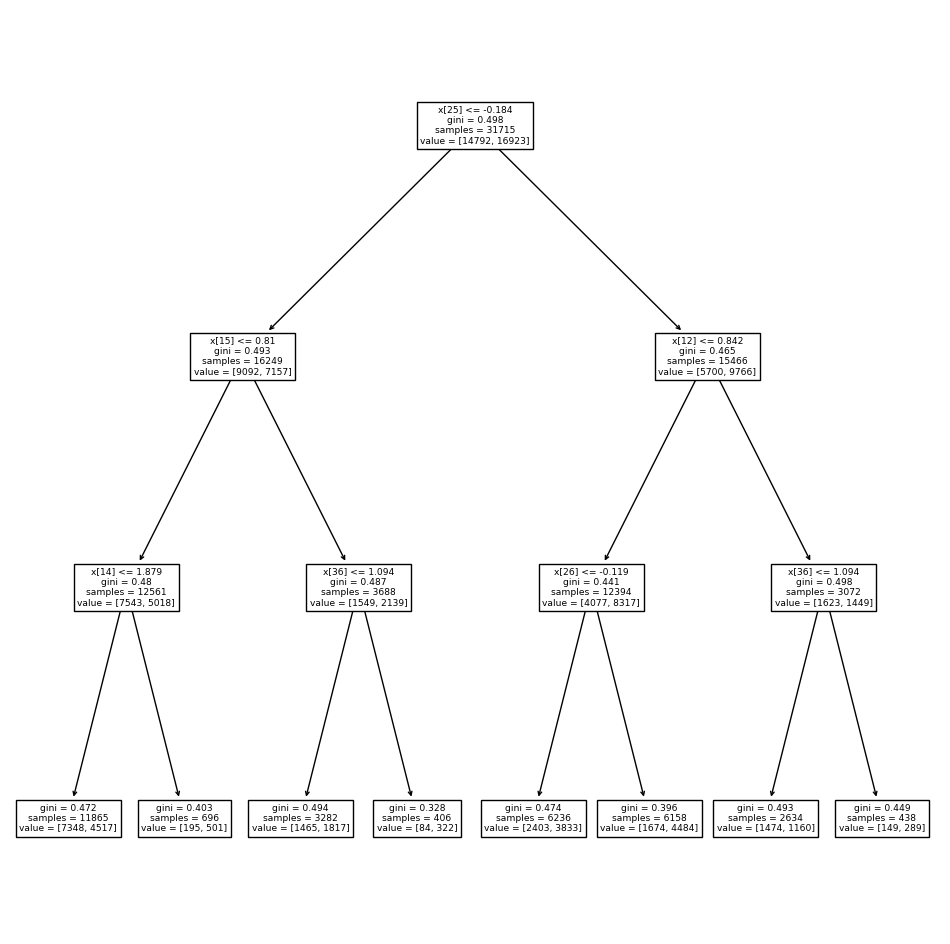

In [62]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(model_d, ax=ax)
plt.show()

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
model_r = RandomForestClassifier(n_estimators=100, random_state=42)
model_r.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [68]:
model_r.score(X_test, y_test)

0.6593517467524278